In [136]:
import numpy as no
import torch
from torch import nn
import matplotlib.pyplot as plt

In [137]:
weights_linear = torch.tensor([3.0, 2.0, 0.5])
weights_squared = torch.tensor([1.5, -2.0, 0.7])
bias = 4.0

X = torch.rand(100, 3)
X_poly = torch.cat([X, X**2], dim = 1)
y = X @ weights_linear + (X**2) @ weights_squared + bias
y = y.unsqueeze(dim = 1)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)
print("X_train.shape:", X_train.shape)  # should be (80, 6)
print("X_test.shape:", X_test.shape)    # should be (20, 6)

X_train.shape: torch.Size([80, 6])
X_test.shape: torch.Size([20, 6])


In [139]:
# Building the model
class PolynomialRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(6, 1, dtype = torch.float), requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return x @ self.weights + self.bias

In [140]:
torch.manual_seed(42)
model = PolynomialRegressionModel()
model.state_dict() # the model outputs random values
X_train.shape

torch.Size([80, 6])

In [141]:
with torch.inference_mode():
  y_pred = model(X_test)

In [142]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [143]:
epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 500

for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
    print(f"Epoch : {epoch}  | Loss : {loss:.4f}  | Test Loss : {test_loss:.4f}")

Epoch : 0  | Loss : 20.2747  | Test Loss : 24.0390
Epoch : 10  | Loss : 9.4896  | Test Loss : 11.7107
Epoch : 20  | Loss : 4.5504  | Test Loss : 5.9257
Epoch : 30  | Loss : 2.2813  | Test Loss : 3.1758
Epoch : 40  | Loss : 1.2321  | Test Loss : 1.8434
Epoch : 50  | Loss : 0.7408  | Test Loss : 1.1793
Epoch : 60  | Loss : 0.5049  | Test Loss : 0.8347
Epoch : 70  | Loss : 0.3865  | Test Loss : 0.6455
Epoch : 80  | Loss : 0.3224  | Test Loss : 0.5340
Epoch : 90  | Loss : 0.2838  | Test Loss : 0.4626
Epoch : 100  | Loss : 0.2575  | Test Loss : 0.4128
Epoch : 110  | Loss : 0.2373  | Test Loss : 0.3754
Epoch : 120  | Loss : 0.2205  | Test Loss : 0.3453
Epoch : 130  | Loss : 0.2058  | Test Loss : 0.3200
Epoch : 140  | Loss : 0.1924  | Test Loss : 0.2981
Epoch : 150  | Loss : 0.1802  | Test Loss : 0.2785
Epoch : 160  | Loss : 0.1688  | Test Loss : 0.2609
Epoch : 170  | Loss : 0.1583  | Test Loss : 0.2447
Epoch : 180  | Loss : 0.1485  | Test Loss : 0.2299
Epoch : 190  | Loss : 0.1393  | Test Lo

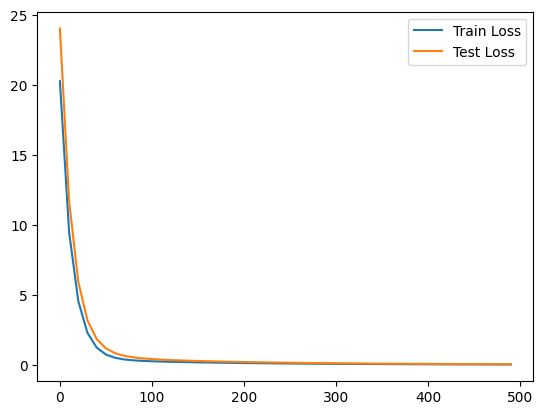

In [144]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.legend()
plt.show()

In [148]:
print(f"\nFinal Training Loss: {train_loss_values[-1] * 100:.3f} %")
print(f"Final Test Loss: {test_loss_values[-1] * 100:.3f} %")


Final Training Loss: 2.763 %
Final Test Loss: 4.493 %
